In [27]:
import pandas as pd
import ta
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('../DB/bitget/1h/BTC-USDT-USDT.csv')
df['date'] = df['date'].apply(lambda x: datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))

# Calculate the Bollinger Bands
df['SMA'] = ta.trend.sma_indicator(df['close'], window=20)
df['Upper'] = df['SMA'] + 2*df['close'].rolling(window=20).std()
df['Lower'] = df['SMA'] - 2*df['close'].rolling(window=20).std()

# Implement the strategy
df['Buy'] = (df['close'] < df['Lower']).astype(int)
df['Sell'] = (df['close'] > df['Upper']).astype(int)

# Backtest the strategy
df['Returns'] = df['close'].pct_change()
df['Strategy'] = df['Returns'] * df['Buy'].shift()
df['Strategy'] = df['Strategy'] - df['Returns'] * df['Sell'].shift()
df['Cumulative Returns'] = (1 + df['Strategy']).cumprod()
df

,date,open,high,low,close,volume,SMA,Upper,Lower,Buy,Sell,Returns,Strategy,Cumulative Returns
0,2019-07-10 13:00:00,13073.5,13075.5,13044.5,13064.5,4.8952,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2019-07-10 14:00:00,13064.5,13064.5,12900.5,13029.0,684.5329,NaN,NaN,NaN,0,0,-0.002717,0.0,1.000000
2,2019-07-10 15:00:00,13029.0,13127.5,12996.5,13039.5,812.2584,NaN,NaN,NaN,0,0,0.000806,0.0,1.000000
3,2019-07-10 16:00:00,13039.5,13065.5,12549.5,12549.5,679.7040,NaN,NaN,NaN,0,0,-0.037578,0.0,1.000000
4,2019-07-10 17:00:00,12549.5,12552.0,12121.0,12362.0,715.6550,NaN,NaN,NaN,0,0,-0.014941,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45322,2024-08-19 12:00:00,57965.1,58155.1,57780.0,58000.0,11360.6110,58888.240,60148.798595,57627.681405,0,0,0.000602,0.0,0.503191
45323,2024-08-19 13:00:00,58000.0,58462.6,57932.0,58343.0,6536.7570,58815.290,60020.863298,57609.716702,0,0,0.005914,0.0,0.503191
45324,2024-08-19 14:00:00,58343.0,58466.6,58207.1,58370.1,5720.9470,58744.015,59871.589674,57616.440326,0,0,0.000464,0.0,0.503191
45325,2024-08-19 15:00:00,58370.1,58928.8,58035.9,58157.8,19331.4370,58676.930,59774.501440,57579.358560,0,0,-0.003637,0.0,0.503191


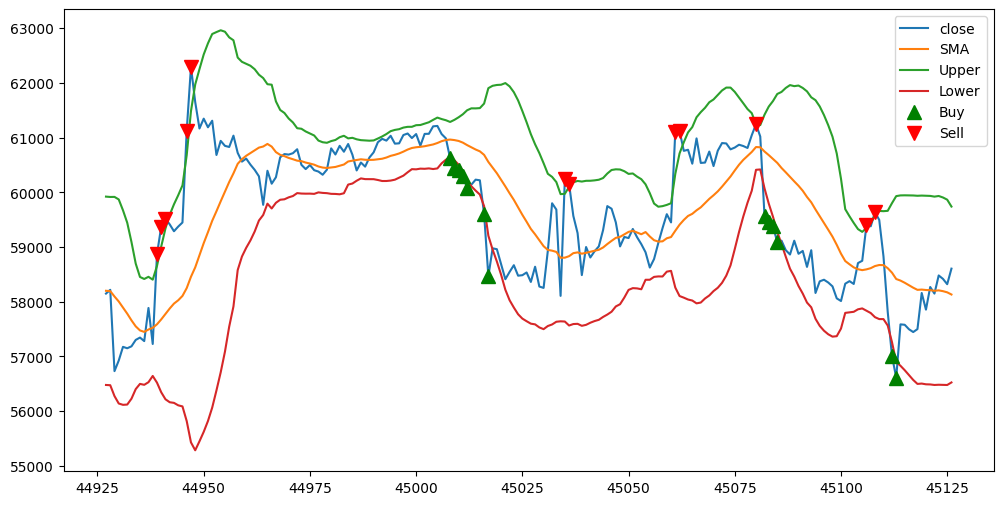

In [32]:
df = df[-200:]
# Plot the price and the Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(df['close'], label='close')
plt.plot(df['SMA'], label='SMA')
plt.plot(df['Upper'], label='Upper')
plt.plot(df['Lower'], label='Lower')

# Plot the buy and sell signals
plt.plot(df[df['Buy'] == 1].index, df['close'][df['Buy'] == 1], '^', markersize=10, color='g', label='Buy')
plt.plot(df[df['Sell'] == 1].index, df['close'][df['Sell'] == 1], 'v', markersize=10, color='r', label='Sell')

plt.legend()
plt.show()
